In [1]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library

# Start with reading the db, filtering outliers and filling the missing data

In [2]:
df = pd.read_csv('protein.csv', sep=',', header=0)

In [3]:
df.head(5)

,ID,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,protein_10
0,0,-1.006417,0.882125,NaN,-2.587934,1.715879,1.720692,-0.465769,1.135213,0.750321,0.627582
1,1,0.772735,-0.961301,1.639747,-2.108846,0.199883,0.568140,1.321528,-0.006901,-2.473787,-0.646808
2,2,-1.052577,-0.104960,1.550213,-2.576606,2.083175,2.015090,0.093019,0.959435,-0.263591,0.535906
3,3,-1.528830,2.176346,-0.214969,-2.021768,-2.962145,-3.295177,2.116420,-1.467550,0.579121,-1.434760
4,4,-1.407823,-1.028772,0.810723,4.052628,-1.700813,1.399962,2.256554,-0.818456,-1.529480,0.754909


In [4]:
df.shape

(494, 11)

In [5]:
df.describe()

,ID,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,protein_10
count,494.000000,489.000000,476.000000,478.000000,476.000000,480.000000,477.000000,487.000000,485.000000,479.000000,477.000000
mean,246.500000,-0.462127,-1.173895,-0.227398,1.465577,0.124944,-0.742783,0.362071,-0.200106,-0.923517,0.146468
std,142.749781,6.533040,19.906275,8.062840,17.277465,3.568627,10.348845,5.693674,4.410810,13.786652,1.662280
min,0.000000,-96.469898,-407.526638,-123.628501,-241.013809,-27.873525,-150.310102,-39.718672,-92.917408,-246.757608,-2.431825
25%,123.250000,-1.018382,-0.948167,-0.666352,-2.263689,-1.710851,-1.741266,-0.788513,-0.818456,-1.048256,-0.637084
50%,246.500000,-0.313710,-0.225694,0.104332,1.745072,-0.347418,-0.696808,-0.100930,-0.082172,0.039068,0.043498
75%,369.750000,0.548909,0.496533,0.817167,3.499794,2.251205,1.240977,0.749700,0.670535,0.872264,0.643888
max,493.000000,15.321833,69.568058,61.466833,208.838313,40.658268,64.340135,87.208302,11.370135,54.358368,23.258043


### for now, fill the NaN with the mean values. And replace the outliers with the mean values

Using the box plot to discover the outliers for some protein:

<AxesSubplot:xlabel='protein_3'>

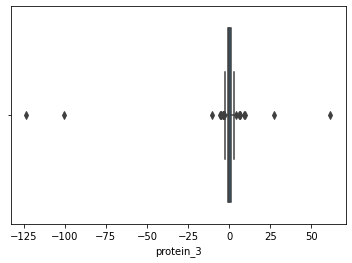

In [6]:
sns.boxplot(x=df['protein_3'])

I will use the z-value to filter outliers:
The Z-score is the signed number of standard deviations
by which the value of an observation or data point is 
above the mean value of what is being observed or measured.

To use the Z-value, i drop all the NaN rows.

In [7]:
df_nonan = df.dropna()

In [8]:
df_nonan.shape

(373, 11)

In [9]:
from scipy import stats
z = np.abs(stats.zscore(df_nonan))

In [10]:
threshold = 3
outliers_arr = np.where(z > 3)
print(outliers_arr)

(array([ 43,  52,  66,  98, 114, 128, 150, 156, 173, 196, 209, 215, 219,
       223, 236, 241, 265, 269, 276, 276, 286, 287, 289, 298, 304, 305,
       323, 340, 349, 349, 363], dtype=int64), array([ 9,  6,  1,  9,  5,  8,  9,  1,  4,  1,  7,  6,  8, 10,  2,  5,  9,
        3,  3,  7,  3,  7,  3,  2,  6, 10,  8, 10,  4,  5,  4],
      dtype=int64))


In [11]:
# outliers_arr[0] - the rows numbers
# outliers_arr[1] - the columns numbers

In [12]:

from copy import copy
protein_keys = ['protein_1', 'protein_2', 'protein_3', 'protein_4', 'protein_5',
       'protein_6', 'protein_7', 'protein_8', 'protein_9', 'protein_10']

# threshold sets the limit = std*threshold, beyond which the outliers are detected
threshold = 3

for key in protein_keys:
    
    new_df = df[['ID',key]].copy()
    
    # remove nans
    new_df = new_df.dropna()
    
    IDs_list = list(new_df.ID)
    
    z = np.abs(stats.zscore(new_df[key]))
    outliers_arr = np.where(z > threshold)
    
    if len(outliers_arr[0]) != 0:
        
        
#         print("\n")
#         print(outliers_arr)

        # printing those outlier values
        for outlier_idx in outliers_arr[0]:
#             print(new_df[key][IDs_list[outlier_idx]])

            # dropping those rows from the new_df
            new_df = new_df.drop(IDs_list[outlier_idx])
            
    else:
        pass # no outliers were detected
        
    
    # find the mean WITHOUT the outliers
    new_mean = new_df[key].mean()
    print(f"new_mean = {new_mean} for key {key}")
    
    # fill the outliers in the original df with mean
#     print("\n\nOriginal dataset")
    for outlier_idx in outliers_arr[0]:
        
        # dropping those rows from the new_df
        print(f"Replacing for ID {IDs_list[outlier_idx]} at key {key}")
        # df.loc[:, ('ID', key)].at[IDs_list[outlier_idx], key] = new_mean
        df.at[IDs_list[outlier_idx], key] = new_mean
    
    
        
    
    
    
    

new_mean = 0.017955286086639738 for key protein_1
Replacing for ID 92 at key protein_1
Replacing for ID 211 at key protein_1
Replacing for ID 265 at key protein_1
new_mean = -0.245733383043987 for key protein_2
Replacing for ID 315 at key protein_2
Replacing for ID 345 at key protein_2
Replacing for ID 399 at key protein_2
new_mean = 0.05614968836723383 for key protein_3
Replacing for ID 357 at key protein_3
Replacing for ID 364 at key protein_3
Replacing for ID 383 at key protein_3
Replacing for ID 387 at key protein_3
new_mean = 0.9839146673330059 for key protein_4
Replacing for ID 207 at key protein_4
Replacing for ID 233 at key protein_4
Replacing for ID 465 at key protein_4
Replacing for ID 482 at key protein_4
new_mean = 0.1428618867472816 for key protein_5
Replacing for ID 158 at key protein_5
Replacing for ID 322 at key protein_5
Replacing for ID 465 at key protein_5
new_mean = -0.15778544624947682 for key protein_6
Replacing for ID 71 at key protein_6
Replacing for ID 98 at ke

## Box plot looks much better

<AxesSubplot:xlabel='protein_3'>

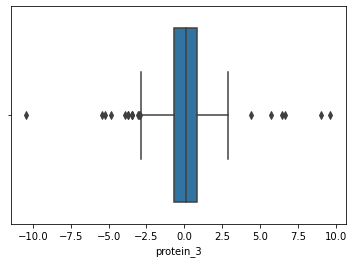

In [13]:
sns.boxplot(x=df['protein_3'])

## Filling the NaN values with the correct mean values

In [14]:
df = df.fillna(df.mean())

In [15]:
df.to_csv('protein_fixed.csv', sep=',', header=True, index=False)

# CLUSTERING

In [121]:
from sklearn.cluster import KMeans
import numpy as np
X = df.drop(['ID'], axis=1).values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [122]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(X)

### user the scaller on the same plot for each class

In [123]:
labels_kmeans = kmeans.labels_

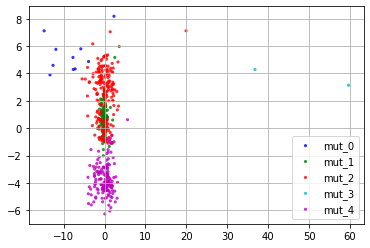

In [124]:
# plot scatter for each class
import matplotlib.pyplot as plt

colors = ('b', 'g', 'r', 'c', 'm')


fig, ax = plt.subplots()

for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_kmeans) if val == idx]

    
    x = reduced_data[class_idx,0]
    y = reduced_data[class_idx,1]
    

    ax.scatter(x, y, c=color, s=10, label=f"mut_{idx}",
               alpha=0.8, edgecolors='none')


ax.legend()
ax.grid(True)

plt.show()


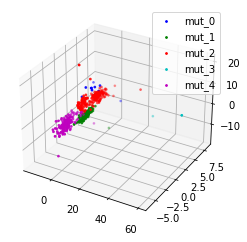

In [125]:

reduced_data_3d = PCA(n_components=3).fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_kmeans) if val == idx]

    
    x = reduced_data_3d[class_idx,0]
    y = reduced_data_3d[class_idx,1]
    z = reduced_data_3d[class_idx,2]
    

    ax.scatter(x, y, z, c=color, label=f"mut_{idx}", s=3)


ax.legend()
ax.grid(True)

plt.show()

# Spectral Clustering

some example from the internet:
https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

In [126]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
import numpy as np

# create the data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# use the nearest neighbor graph as our adjacency matrix
A = kneighbors_graph(X, n_neighbors=5).toarray()
print(A)

# [[0. 0. 0. ... 0. 0. 0.]
#  [0. 0. 0. ... 0. 0. 0.]
#  [0. 0. 0. ... 0. 0. 0.]
#  ...
#  [0. 0. 0. ... 0. 1. 0.]
#  [0. 0. 0. ... 0. 0. 0.]
#  [0. 0. 0. ... 0. 0. 0.]]
 
# create the graph laplacian
D = np.diag(A.sum(axis=1))
L = D-A

# find the eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

# use Fiedler value to find best cut to separate data
clusters = vecs[:,1] > 0

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Example from sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

In [127]:
from sklearn.cluster import SpectralClustering
import numpy as np

# X is an array 6X2 of locations in 2D 

X = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])
clustering = SpectralClustering(n_clusters=2,
        assign_labels="kmeans",
        random_state=0).fit(X)
print(clustering.labels_)

clustering

[1 1 1 0 0 0]


SpectralClustering(n_clusters=2, random_state=0)

### Now trying on our dataset

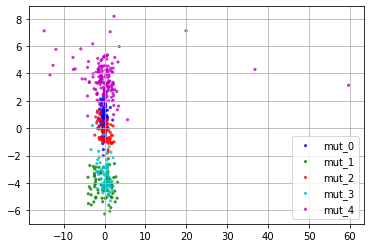

In [128]:
X = df.drop(['ID'], axis=1).values

clustering_virus = SpectralClustering(n_clusters=5,
        affinity='nearest_neighbors',
        assign_labels="discretize",
        random_state=0).fit(X)

labels_spectral = clustering_virus.labels_


### Using PCA again to vizualize the clusters

# plot scatter for each class
import matplotlib.pyplot as plt

colors = ('b', 'g', 'r', 'c', 'm')

fig, ax = plt.subplots()

for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_spectral) if val == idx]

    
    x = reduced_data[class_idx,0]
    y = reduced_data[class_idx,1]
    

    ax.scatter(x, y, c=color, s=10, label=f"mut_{idx}",
               alpha=0.8, edgecolors='none')


ax.legend()
ax.grid(True)

plt.show()



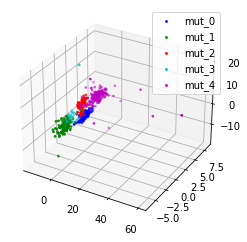

In [129]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_spectral) if val == idx]

    
    x = reduced_data_3d[class_idx,0]
    y = reduced_data_3d[class_idx,1]
    z = reduced_data_3d[class_idx,2]
    

    ax.scatter(x, y, z, c=color, label=f"mut_{idx}", s=3)


ax.legend()
ax.grid(True)

plt.show()

In fact those results look better than the ones with K-means. To validate we use the silhouette score.

In [130]:
from sklearn import metrics

metrics_list = ['l1', 'l2', 'cosine']

for metric in metrics_list:

    kmeans_score = metrics.silhouette_score(X, labels_kmeans, metric=metric)
    spectral_score = metrics.silhouette_score(X, labels_spectral, metric=metric)

    print(f"Metric: {metric}")
    print(f"\tkmeans_score = {round(kmeans_score,3)}")
    print(f"\tspectral_score = {round(spectral_score,3)}")

Metric: l1
	kmeans_score = 0.222
	spectral_score = 0.238
Metric: l2
	kmeans_score = 0.261
	spectral_score = 0.244
Metric: cosine
	kmeans_score = 0.322
	spectral_score = 0.456


The cosine score seems to be much higher for the spectral. Other metrics seem to be similar

Now we find the most dominant features. There are 2 ways we test:

- muticlass classification


Using labels of clusters, we train classifier, and reveal the most dominant features used for the classification
- intra-class feature similarity: 


For each feature, we calculate similarity (with some function) of each sample to the centroid in this class
If the similarity for a spefic feature is high (distances are low), the feature is highly relevant for the class separation

In [131]:
# Start with intra-class feature similarity
import math 

# euclidean distance for instance
def calc_similarity(feature_val, centroid_val):
    sigma = 1
    distance = np.linalg.norm(feature_val-centroid_val)
    return np.exp(-distance/(sigma**2))

results = np.zeros((5,10))

for class_idx in range(5):
    
    # get the indexes of this specific class
    class_labels = [relevant_class for relevant_class in range(len(labels_spectral)) if labels_spectral[relevant_class] == class_idx]    
    
    for feature_idx in range(10):  
        
        # list of all the feature values for this specific class
        feature_class_mx = X[class_labels, feature_idx]
        
        # find the mean 
        class_feature_mean = np.mean(feature_class_mx)
        
        similarity = 0
        
        for feature in range(len(class_labels)):
            similarity += calc_similarity(feature_class_mx[feature], class_feature_mean)
            
        
        results[class_idx, feature_idx] = similarity
        



In [132]:
print("RESULTS\n")
from tabulate import tabulate

headers = [f"feature_{idx}" for idx in range(10)]
rowIDs = range(5)


table = tabulate(results, headers, floatfmt=".4f", showindex=rowIDs)
print(table)


RESULTS

      feature_0    feature_1    feature_2    feature_3    feature_4    feature_5    feature_6    feature_7    feature_8    feature_9
--  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
 0      68.5702      91.1412      75.2108      70.3830      60.5650      74.7109      81.7262      80.5767      78.9396      80.5396
 1      31.5218      21.3665      42.9162      38.8519      34.1256      38.2737      33.8812      40.1261      41.9812      36.1326
 2      34.4962      31.0683      28.8471      32.0706      27.3605      13.2361      36.8326      34.3448      34.6677      31.0114
 3      32.6632      42.2488      28.6560      39.8108      43.9711      31.0128      43.7586      45.8346      33.4942      47.5409
 4      56.6507      54.0160      73.4163      68.0460      70.7771      55.7836      50.0169      75.9679      74.6233      97.4699


In [133]:
indexes_sort = np.argsort(results, kind='quicksort', axis=1)

results_sorted = np.zeros((5,10))

for class_idx in range(5):
    for order_idx in range(10):
        
        feature_in_order = indexes_sort[class_idx, order_idx]
        
        results_sorted[class_idx, feature_in_order] = order_idx

In [134]:
table = tabulate(results_sorted, headers, floatfmt=".0f", showindex=rowIDs)
print(table)

      feature_0    feature_1    feature_2    feature_3    feature_4    feature_5    feature_6    feature_7    feature_8    feature_9
--  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
 0            1            9            4            2            0            3            8            7            5            6
 1            1            0            9            6            3            5            2            7            8            4
 2            7            4            2            5            1            0            9            6            8            3
 3            2            5            0            4            7            1            6            8            3            9
 4            3            1            6            4            5            2            0            8            7            9


### we are looking for features with highest similarity score. The score of 9 means this feature is very dominant at specific class classification

- Feature 9:  dominant for class 3,4 -> take
- Feature 6:  dominant for Class 2, important for class 0 -> take
- Feature 2:  dominant for class 1 -> take 
- Feature 1:  dominant for class 0 -> take
- Feature 7:  important for many classes -> take

To validate the results, let's take only those features and try to make a classification again

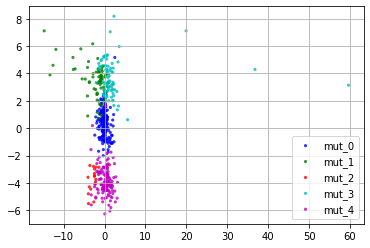

In [146]:
X = df.drop(['ID'], axis=1).values
features_rows = [1, 2, 3, 6, 7, 8, 9]
# features_rows = [2, 6, 7, 8, 9]
X_new = X[:, features_rows]

clustering_virus_truncated = SpectralClustering(n_clusters=5,
        affinity='nearest_neighbors',
        assign_labels="discretize",
        random_state=0).fit(X_new)

labels_spectral_truncated = clustering_virus_truncated.labels_


### Using PCA again to vizualize the clusters

# plot scatter for each class
import matplotlib.pyplot as plt

colors = ('b', 'g', 'r', 'c', 'm')

fig, ax = plt.subplots()

for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_spectral_truncated) if val == idx]

    
    x = reduced_data[class_idx,0]
    y = reduced_data[class_idx,1]
    

    ax.scatter(x, y, c=color, s=10, label=f"mut_{idx}",
               alpha=0.8, edgecolors='none')


ax.legend()
ax.grid(True)

plt.show()



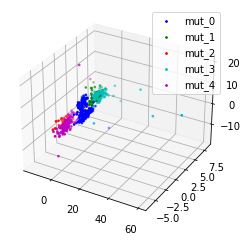

In [147]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_spectral_truncated) if val == idx]
    
    x = reduced_data_3d[class_idx,0]
    y = reduced_data_3d[class_idx,1]
    z = reduced_data_3d[class_idx,2]
    

    ax.scatter(x, y, z, c=color, label=f"mut_{idx}", s=3)


ax.legend()
ax.grid(True)

plt.show()

In [148]:
from sklearn import metrics

metrics_list = ['l1', 'l2', 'cosine']

for metric in metrics_list:

    kmeans_score = metrics.silhouette_score(X, labels_kmeans, metric=metric)
    spectral_score = metrics.silhouette_score(X, labels_spectral, metric=metric)
    spectral_score_truncated = metrics.silhouette_score(X, labels_spectral_truncated, metric=metric)

    print(f"Metric: {metric}")
    print(f"\tkmeans_score = {round(kmeans_score,3)}")
    print(f"\tspectral_score_1 = {round(spectral_score,3)}")
    print(f"\tspectral_score_2 = {round(spectral_score_truncated,3)}")

Metric: l1
	kmeans_score = 0.222
	spectral_score_1 = 0.238
	spectral_score_2 = 0.22
Metric: l2
	kmeans_score = 0.261
	spectral_score_1 = 0.244
	spectral_score_2 = 0.193
Metric: cosine
	kmeans_score = 0.322
	spectral_score_1 = 0.456
	spectral_score_2 = 0.209
